In [5]:
# linear regression to predict Amount
library(readr)
credit_data_sample<- read.csv("M:\\Imarticus\\ProjectR\\Credit card fraud\\Datafiles\\credit_data_sample.csv", header = TRUE,
                              stringsAsFactors = TRUE,
                              strip.white = FALSE ,
                              sep = ',')
str(credit_data_sample)

'data.frame':	1998 obs. of  31 variables:
 $ Time  : int  74 80 263 406 421 472 804 821 862 951 ...
 $ V1    : num  1.038 -0.655 1.144 -2.312 -1.398 ...
 $ V2    : num  0.12749 0.4099 0.12821 1.95199 0.00457 ...
 $ V3    : num  0.184 1.289 0.407 -1.61 2.529 ...
 $ V4    : num  1.11 -0.325 1.161 3.998 0.648 ...
 $ V5    : num  0.442 0.546 -0.505 -0.522 -0.197 ...
 $ V6    : num  0.945 -0.35 -0.905 -1.427 0.163 ...
 $ V7    : num  -0.0367 0.6482 0.112 -2.5374 -0.2783 ...
 $ V8    : num  0.351 0.0361 -0.1517 1.3917 0.366 ...
 $ V9    : num  0.1189 0.0787 0.1804 -2.7701 0.4355 ...
 $ V10   : num  -0.24329 -0.82917 0.00103 -2.77227 -0.30806 ...
 $ V11   : num  0.578 -1.782 -0.512 3.202 -0.678 ...
 $ V12   : num  0.675 -0.413 -0.234 -2.9 -0.22 ...
 $ V13   : num  -0.534 -0.626 -0.815 -0.595 -0.643 ...
 $ V14   : num  0.447 -0.113 0.513 -4.289 -0.384 ...
 $ V15   : num  1.123 -0.715 1.121 0.39 0.814 ...
 $ V16   : num  -1.768 0.121 0.219 -1.141 -0.472 ...
 $ V17   : num  1.241 -0.474 -0.424 -

In [6]:
library(dplyr)
credit_data_Lreg<- select(credit_data_sample,c(-31))
head(credit_data_Lreg)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
74,1.0383703,0.127486127,0.1844559,1.1099498,0.4416989,0.9452825,-0.0367146,0.35099500,0.11894954,...,-0.33551985,0.10251980,0.60508853,0.02309216,-0.62646266,0.47912027,-0.1669368,0.081246718,0.001191576,1.18
80,-0.6552643,0.409898543,1.2891564,-0.3250433,0.5456695,-0.3498107,0.6482405,0.03606288,0.07870142,...,-0.03477599,-0.15572706,-0.47739032,-0.12652499,-0.44362778,-0.01211814,0.1431729,0.049782585,0.118280287,32.51
263,1.1436489,0.128210203,0.4072555,1.1609501,-0.5045315,-0.9048430,0.1119931,-0.15166747,0.18040848,...,-0.10203410,-0.03600050,-0.22175421,-0.04974974,0.34548334,0.49565773,-0.4404433,0.008208615,0.031689210,49.99
406,-2.3122265,1.951992011,-1.6098507,3.9979056,-0.5221879,-1.4265453,-2.5373873,1.39165725,-2.77008928,...,0.12691056,0.51723237,-0.03504937,-0.46521108,0.32019820,0.04451917,0.1778398,0.261145003,-0.143275875,0.00
421,-1.3977756,0.004572569,2.5289643,0.6482789,-0.1966251,0.1631901,-0.2782965,0.36604531,0.43549314,...,0.05648148,-0.08722224,0.15004432,0.32230558,0.09175323,0.17195550,0.5094034,0.266857698,0.094295607,12.41
472,-3.0435406,-3.157307121,1.0884628,2.2886436,1.3598051,-1.0648225,0.3255743,-0.06779365,-0.27095284,...,2.10233879,0.66169592,0.43547721,1.37596574,-0.29380315,0.27979803,-0.1453617,-0.252773123,0.035764225,529.00


In [7]:
cor(credit_data_Lreg)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000000,0.200374077,-0.176027033,0.073355703,-0.1862206529,0.25208986,0.068860907,0.196828212,-0.100595167,0.125005425,...,-0.06337496,-0.033625981,0.130140933,0.0414753616,-0.005738219,-0.223673934,-0.033036241,-0.096869022,0.026630375,0.006999431
V1,0.200374077,1.000000000,-0.647750942,0.818954352,-0.5889244950,0.79578004,0.272678737,0.819078394,-0.071231489,0.605890022,...,-0.20530207,0.008115858,-0.033911697,0.0113758839,-0.033613965,-0.042065855,0.021254657,0.151566903,0.051108493,-0.103845938
V2,-0.176027033,-0.647750942,1.000000000,-0.748615039,0.5922509248,-0.68356356,-0.259172767,-0.774258775,-0.003460944,-0.622481462,...,0.26713536,0.077613285,0.004588481,0.1427305102,-0.035214864,0.081381224,-0.004814395,-0.097297367,-0.018662533,-0.315091724
V3,0.073355703,0.818954352,-0.748615039,1.000000000,-0.7385609711,0.80428352,0.393389885,0.859144328,-0.159728798,0.709270885,...,-0.28861738,0.002397088,-0.054037054,0.0054110891,0.018391242,-0.061447115,-0.018164906,0.068389055,0.036307326,-0.074881207
V4,-0.186220653,-0.588924495,0.592250925,-0.738560971,1.0000000000,-0.55559003,-0.363305983,-0.668751497,0.090026440,-0.681192021,...,0.21457120,0.004804267,0.070939480,0.0002535122,-0.050186211,-0.009716653,0.097896497,0.016677642,0.020150966,0.057567701
V5,0.252089861,0.795780045,-0.683563564,0.804283523,-0.5555900348,1.00000000,0.295615210,0.815657208,-0.190326669,0.586172750,...,-0.23544154,0.021179288,-0.077816944,-0.0180955597,-0.069020514,-0.072565653,0.047874291,0.163188449,0.016398837,-0.135393509
V6,0.068860907,0.272678737,-0.259172767,0.393389885,-0.3633059829,0.29561521,1.000000000,0.253977354,-0.430481300,0.320026907,...,-0.12198469,-0.012638463,0.001597922,0.1722948473,0.023815887,-0.100794120,-0.006489080,-0.163347791,0.065470812,0.103077449
V7,0.196828212,0.819078394,-0.774258775,0.859144328,-0.6687514974,0.81565721,0.253977354,1.000000000,0.072732833,0.714741012,...,-0.33573694,0.013125249,-0.098425823,-0.0990983930,-0.007952813,0.026889754,0.008479652,0.156750796,0.124573250,0.101707577
V8,-0.100595167,-0.071231489,-0.003460944,-0.159728798,0.0900264397,-0.19032667,-0.430481300,0.072732833,1.000000000,-0.072931080,...,-0.01762268,-0.098524892,0.027631415,-0.3504444790,0.038839284,0.173291027,0.036785011,0.250849542,0.016350947,0.013990668
V9,0.125005425,0.605890022,-0.622481462,0.709270885,-0.6811920209,0.58617275,0.320026907,0.714741012,-0.072931080,1.000000000,...,-0.35658515,0.108616988,-0.177372284,-0.0480399261,0.022524337,-0.030997838,-0.094510035,0.052933865,0.096652990,-0.008305768


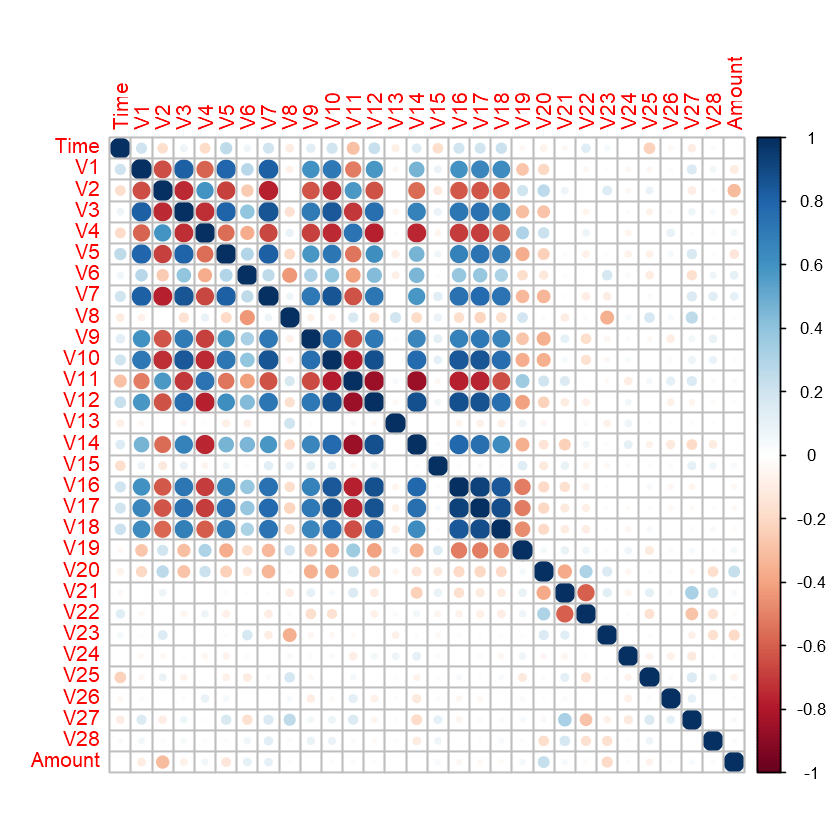

In [13]:
library(corrplot)
corrplot(cor(credit_data_Lreg))

In [3]:
linearmod<- lm(Amount~.,data=credit_data_Lreg)
summary(linearmod)


Call:
lm(formula = Amount ~ ., data = credit_data_Lreg)

Residuals:
    Min      1Q  Median      3Q     Max 
-900.50  -26.81  -11.78    8.63  984.38 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.777e+01  5.701e+00  15.395  < 2e-16 ***
Time        -1.543e-05  5.563e-05  -0.277 0.781512    
V1          -1.356e+01  9.335e-01 -14.527  < 2e-16 ***
V2          -6.058e+01  1.106e+00 -54.755  < 2e-16 ***
V3          -2.470e+01  1.290e+00 -19.157  < 2e-16 ***
V4           1.338e+01  1.295e+00  10.329  < 2e-16 ***
V5          -5.749e+01  1.416e+00 -40.604  < 2e-16 ***
V6           3.561e+01  1.532e+00  23.248  < 2e-16 ***
V7           6.984e+01  1.399e+00  49.932  < 2e-16 ***
V8          -1.845e+01  8.310e-01 -22.198  < 2e-16 ***
V9          -1.342e+01  1.785e+00  -7.518 8.39e-14 ***
V10         -2.042e+01  1.821e+00 -11.215  < 2e-16 ***
V11          2.001e-01  1.978e+00   0.101 0.919451    
V12         -6.689e+00  1.655e+00  -4.042 5.51e-05 ***
V13      

In [4]:
library(mctest)
omcdiag(credit_data_Lreg, credit_data_Lreg$Amount)

Warning message in summary.lm(lm(y ~ x)):
"essentially perfect fit: summary may be unreliable"


Call:
omcdiag(x = credit_data_Lreg, y = credit_data_Lreg$Amount)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.0000         1
Farrar Chi-Square:     50555.0345         1
Red Indicator:             0.3569         0
Sum of Lambda Inverse:   164.6166         1
Theil's Method:          -10.6193         0
Condition Number:         24.4004         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test


In [5]:
imcdiag(credit_data_Lreg, credit_data_Lreg$Amount)

Warning message in summary.lm(lm(y ~ x)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(y ~ x)):
"essentially perfect fit: summary may be unreliable"


Call:
imcdiag(x = credit_data_Lreg, y = credit_data_Lreg$Amount)


All Individual Multicollinearity Diagnostics Result

           VIF    TOL        Wi        Fi Leamer CVIF Klein
Time    1.9707 0.5074   65.8763   68.2637 0.7123    0     0
V1      4.9752 0.2010  269.7664  279.5428 0.4483    0     0
V2      7.8204 0.1279  462.8436  479.6173 0.3576    0     0
V3     12.6630 0.0790  791.4735  820.1570 0.2810    0     0
V4      3.6899 0.2710  182.5421  189.1575 0.5206    0     0
V5     10.2890 0.0972  630.3703  653.2153 0.3118    0     0
V6      2.0464 0.4887   71.0080   73.5814 0.6991    0     0
V7     23.6289 0.0423 1535.6443 1591.2969 0.2057    0     0
V8      2.8970 0.3452  128.7327  133.3981 0.5875    0     0
V9      3.2601 0.3067  153.3723  158.9306 0.5538    0     0
V10    12.0711 0.0828  751.3064  778.5341 0.2878    0     0
V11     5.6119 0.1782  312.9747  324.3170 0.4221    0     0
V12    10.1141 0.0989  618.5001  640.9149 0.3144    0     0
V13     1.0756 0.9297    5.1287    5.31

In [6]:
linearmod<- lm(Amount~.-Time-V11-V13-V15-V17-V24-V27-V7,data=credit_data_Lreg)

summary(linearmod)


Call:
lm(formula = Amount ~ . - Time - V11 - V13 - V15 - V17 - V24 - 
    V27 - V7, data = credit_data_Lreg)

Residuals:
    Min      1Q  Median      3Q     Max 
-708.23  -64.54  -12.59   43.51 1511.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  87.3316     3.2035  27.261  < 2e-16 ***
V1           -1.8850     1.3451  -1.401  0.16125    
V2          -73.3066     1.6241 -45.135  < 2e-16 ***
V3          -10.7059     1.5906  -6.731 2.20e-11 ***
V4           13.5351     1.9385   6.982 3.95e-12 ***
V5          -37.9543     1.9567 -19.397  < 2e-16 ***
V6           30.7119     2.3170  13.255  < 2e-16 ***
V8           -3.1067     1.1017  -2.820  0.00485 ** 
V9           -5.5740     2.6647  -2.092  0.03659 *  
V10          -4.1852     2.6607  -1.573  0.11589    
V12          -2.9698     2.3527  -1.262  0.20698    
V14           1.2707     2.0659   0.615  0.53855    
V16          -0.6601     2.9835  -0.221  0.82493    
V18          22.3694     3.1694   7.058

In [7]:
linearmod<- lm(Amount~.-Time-V11-V13-V15-V17-V24-V27-V26-V1-V8-V9-V10-V12-V14-V16-V22-V25-V26-V28,data=credit_data_Lreg)

summary(linearmod)


Call:
lm(formula = Amount ~ . - Time - V11 - V13 - V15 - V17 - V24 - 
    V27 - V26 - V1 - V8 - V9 - V10 - V12 - V14 - V16 - V22 - 
    V25 - V26 - V28, data = credit_data_Lreg)

Residuals:
    Min      1Q  Median      3Q     Max 
-745.12  -58.61  -14.26   38.69 1230.66 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  90.4633     2.7876  32.452  < 2e-16 ***
V2          -60.7113     1.4339 -42.340  < 2e-16 ***
V3          -25.8193     1.3075 -19.748  < 2e-16 ***
V4           19.7122     1.4566  13.533  < 2e-16 ***
V5          -49.0728     1.5789 -31.079  < 2e-16 ***
V6           42.6091     1.8582  22.930  < 2e-16 ***
V7           36.5545     1.4533  25.152  < 2e-16 ***
V18          -0.2769     2.2828  -0.121    0.903    
V19         -13.5597     2.7529  -4.926 9.11e-07 ***
V20         124.4721     3.4393  36.191  < 2e-16 ***
V21          35.5926     1.4512  24.526  < 2e-16 ***
V23         -41.7967     2.9096 -14.365  < 2e-16 ***
---
Signif. codes:  0 '

In [10]:
linearmod_final<- lm(Amount~ V2+V3+V4+V5+V6+V7+V19+V20+V21+V23,data=credit_data_Lreg)

summary(linearmod_final)


Call:
lm(formula = Amount ~ V2 + V3 + V4 + V5 + V6 + V7 + V19 + V20 + 
    V21 + V23, data = credit_data_Lreg)

Residuals:
    Min      1Q  Median      3Q     Max 
-745.61  -58.60  -14.50   38.59 1230.68 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   90.477      2.785  32.490  < 2e-16 ***
V2           -60.715      1.433 -42.364  < 2e-16 ***
V3           -25.815      1.307 -19.757  < 2e-16 ***
V4            19.742      1.435  13.754  < 2e-16 ***
V5           -49.109      1.549 -31.696  < 2e-16 ***
V6            42.590      1.851  23.006  < 2e-16 ***
V7            36.505      1.395  26.174  < 2e-16 ***
V19          -13.467      2.643  -5.095 3.81e-07 ***
V20          124.482      3.438  36.212  < 2e-16 ***
V21           35.620      1.434  24.848  < 2e-16 ***
V23          -41.829      2.897 -14.440  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 114.6 on 1987 degrees of freedom
Multiple R-square

In [11]:
library(car)
car::vif(linearmod_final)
car::ncvTest(linearmod_final)

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



V2       V3       V4       V5       V6       V7      V19      V20 
2.875797 6.058004 2.377513 3.707213 1.296928 5.730460 1.218615 1.421344 
     V21      V23 
1.285186 1.162308

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1559.393, Df = 1, p = < 2.22e-16

In [11]:
library(caTools)

split = sample.split(credit_data_Lreg$Amount, SplitRatio = .8)
training_data = subset(credit_data_Lreg, split == TRUE)
test_data = subset(credit_data_Lreg, split == FALSE)
str(test_data)

'data.frame':	400 obs. of  30 variables:
 $ Time  : int  406 804 821 1610 1836 2103 2205 2920 4013 6867 ...
 $ V1    : num  -2.312 -0.702 -1.026 -2.925 -0.629 ...
 $ V2    : num  1.952 0.5089 -0.4548 2.528 -0.0989 ...
 $ V3    : num  -1.61 2.249 2.745 -0.313 2.446 ...
 $ V4    : num  3.998 0.482 -1.533 -1.008 -1.846 ...
 $ V5    : num  -0.522 -0.237 -1.091 -1.176 -0.978 ...
 $ V6    : num  -1.4265 -0.0712 -0.0856 -0.692 0.131 ...
 $ V7    : num  -2.5374 0.2773 0.0624 -0.6073 -0.324 ...
 $ V8    : num  1.3917 0.2058 -0.0658 1.5601 0.1944 ...
 $ V9    : num  -2.77 -0.136 -0.886 0.651 -0.803 ...
 $ V10   : num  -2.772 -0.58 0.232 0.734 -0.177 ...
 $ V11   : num  3.202 0.8999 0.9708 0.0921 -1.6196 ...
 $ V12   : num  -2.9 1.107 0.301 0.352 -0.998 ...
 $ V13   : num  -0.595 0.208 0.135 -1.64 0.175 ...
 $ V14   : num  -4.289 -0.252 -0.684 0.925 -0.524 ...
 $ V15   : num  0.39 -1.146 -0.644 -0.823 1.045 ...
 $ V16   : num  -1.1407 0.0204 -0.933 0.5981 -0.2109 ...
 $ V17   : num  -2.83 -0.499 

In [20]:
lin_mod_train<- lm(Amount~ V2+V3+V4+V5+V6+V7+V19+V20+V21+V23,data=training_data)
summary(lin_mod_train)


Call:
lm(formula = Amount ~ V2 + V3 + V4 + V5 + V6 + V7 + V19 + V20 + 
    V21 + V23, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-702.64  -59.29  -15.97   37.46 1183.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   91.346      3.260   28.02  < 2e-16 ***
V2           -60.269      1.630  -36.97  < 2e-16 ***
V3           -24.547      1.521  -16.14  < 2e-16 ***
V4            20.624      1.663   12.40  < 2e-16 ***
V5           -49.205      1.769  -27.81  < 2e-16 ***
V6            43.432      2.113   20.56  < 2e-16 ***
V7            36.195      1.603   22.58  < 2e-16 ***
V19          -12.871      3.036   -4.24 2.37e-05 ***
V20          129.541      3.951   32.79  < 2e-16 ***
V21           36.535      1.653   22.10  < 2e-16 ***
V23          -45.427      3.204  -14.18  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 119.7 on 1587 degrees of freedom
Multiple R-squared: 

In [14]:
pred_dist=predict(lin_mod_train,test_data)
result<- data.frame(Amount=test_data$Amount,pred_Amount=pred_dist,diff=(test_data$Amount - pred_dist))
head(result ,20)

,Amount,pred_Amount,diff
4,0.00,18.670853,-18.67085
7,34.95,55.928245,-20.97825
8,82.50,25.304667,57.19533
13,1.00,-32.267890,33.26789
15,42.94,18.008726,24.93127
17,1.00,-21.208842,22.20884
20,18.99,-8.147907,27.13791
22,1.00,-35.911970,36.91197
28,525.00,388.952908,136.04709
34,0.00,92.801437,-92.80144


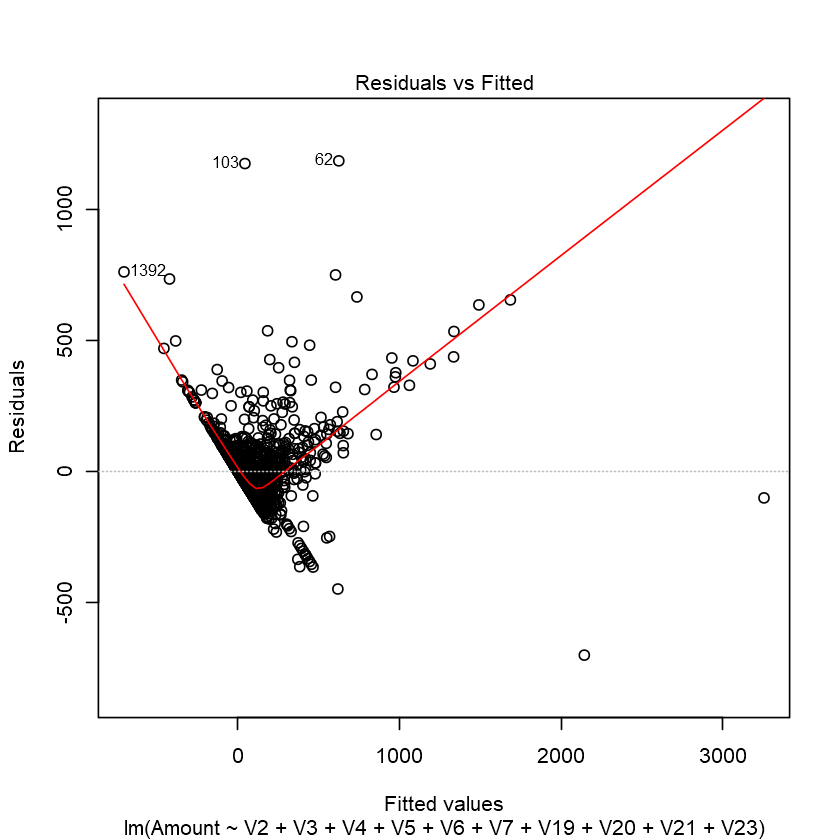

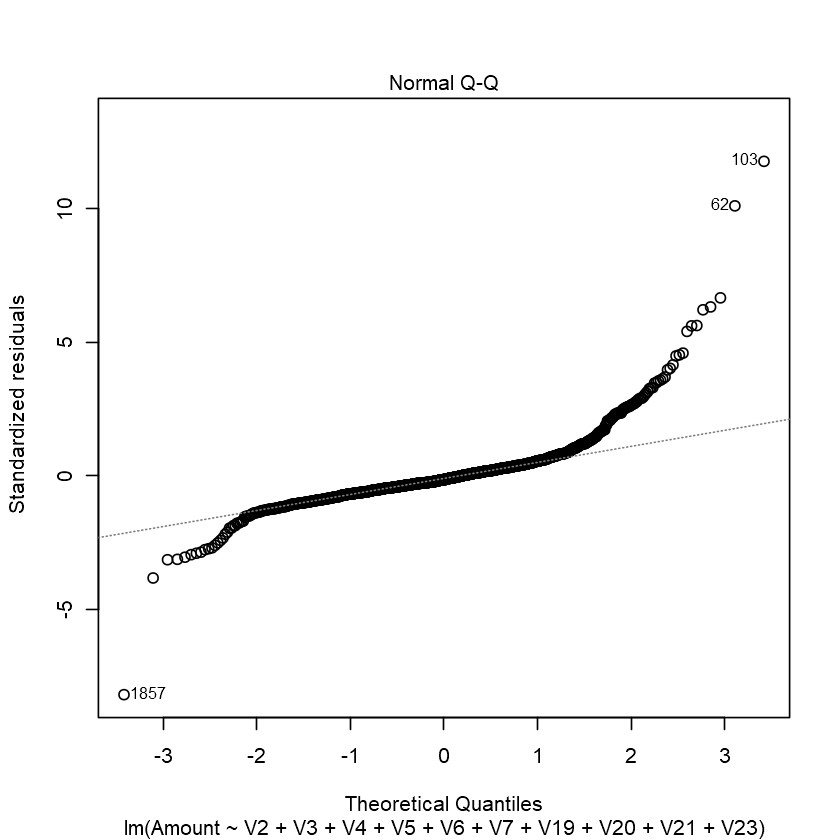

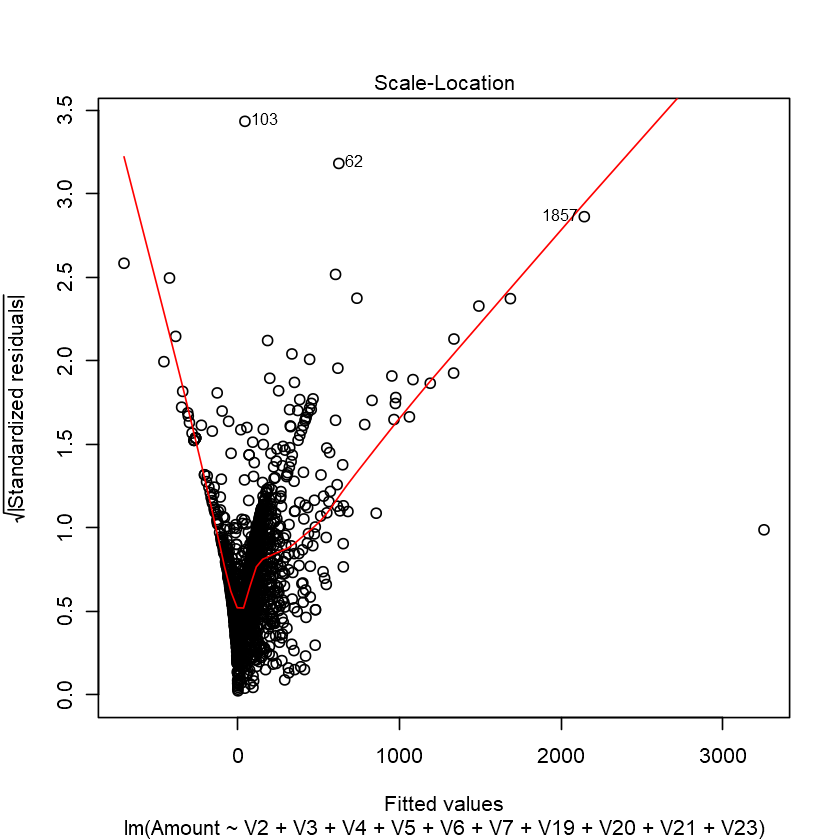

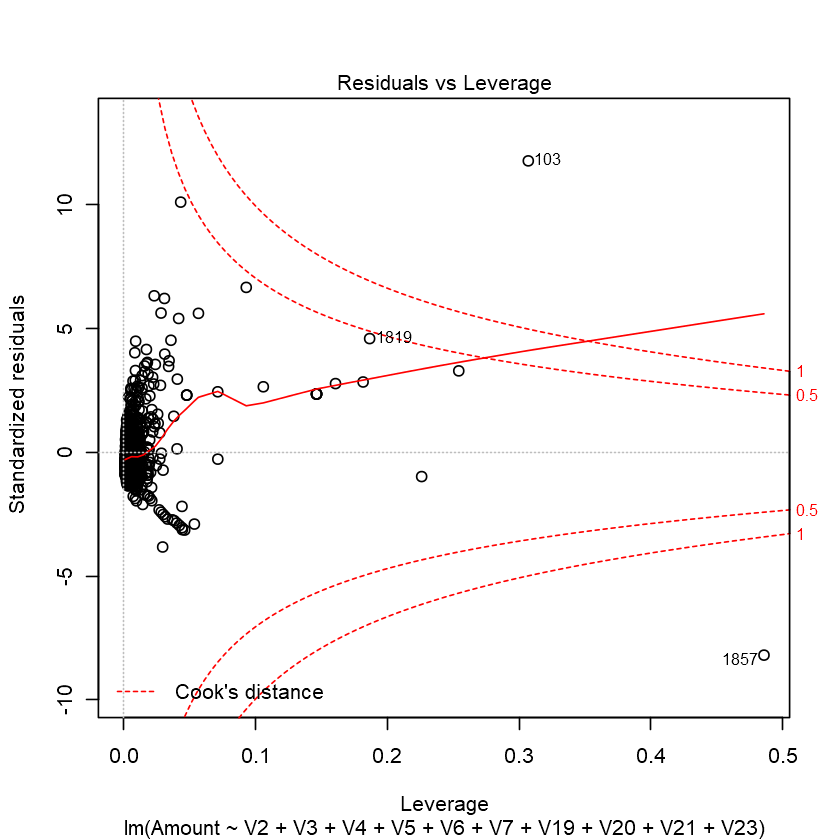

In [19]:
plot(lin_mod_train)

In [ ]:
#conclusion
# As the correlation between Amount variable and remaning variables is week, due to that 
# their is large difference between actual and predicted amount.